In [1]:
import numpy as np
from torchvision import datasets, transforms
import torch
import pandas as pd
#from google.colab import files
import os
import seaborn as sns
import matplotlib.pyplot as plt



USE_CUDA = torch.cuda.is_available()
# USE_CUDA = False
DLD_DATA = True
print(USE_CUDA)

False


In [ ]:
Train_Test_MNIST_(1).ipynb

In [2]:
import onnx
from onnx2pytorch import ConvertModel

#python: aliased to /opt/homebrew/bin/python3.9
#/opt/homebrew/bin/pip

import os
onnx_model = onnx.load(f"{os.getcwd()}/mnist-net_256x4.onnx")
pytorch_model = ConvertModel(onnx_model)

/opt/homebrew/lib/python3.9/site-packages/onnx2pytorch/convert/layer.py:30: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:178.)
  layer.weight.data = torch.from_numpy(numpy_helper.to_array(weight))


In [3]:
TRAIN_BS = 30
TEST_BS = 30

device = torch.device("cuda" if USE_CUDA else "cpu")
train_kwargs = {'batch_size': TRAIN_BS, 'shuffle': False}
test_kwargs = {'batch_size': TEST_BS, 'shuffle': False}
# if USE_CUDA:
#     cuda_kwargs = {'num_workers': 1,
#                    'pin_memory': True,
#                    'shuffle': True}
#     train_kwargs.update(cuda_kwargs)
#     test_kwargs.update(cuda_kwargs)

transform = transforms.Compose([
    transforms.ToTensor(),
])


train_set = datasets.MNIST('./data', train=True, download=DLD_DATA,
                          transform=transform)
test_set = datasets.MNIST('./data', train=False, download=DLD_DATA,
                          transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, **train_kwargs)
test_loader = torch.utils.data.DataLoader(test_set, **test_kwargs)

for train_data, train_target in train_loader:
    print(train_data.size())
    print(train_target.size())

torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size([30, 1, 28, 28])
torch.Size([30])
torch.Size

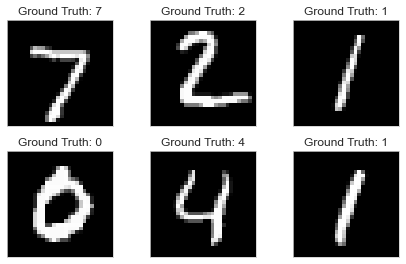

In [5]:
import matplotlib.pyplot as plt
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1) #2 rows, 3 columns. 1 2 3, (next row) 4 5 6
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

#plt.savefig('figure.png', dpi=300, bbox_inches='tight')
#plt.close(fig)  # Close the figure window


In [6]:
len(example_data[0][0][0])

28

In [7]:
pytorch_model(example_data[0]).argmax()
#example_targets[0]

tensor(7)

In [40]:
pytorch_model #(train_set[10])
# ConvertModel(
#   (Flatten_11): Flatten() 28x28
#   (Gemm_12): Linear(in_features=784, out_features=256, bias=True)
#   (Relu_13): ReLU(inplace=True)
#   (Gemm_14): Linear(in_features=256, out_features=256, bias=True)
#   (Relu_15): ReLU(inplace=True)
#   (Gemm_16): Linear(in_features=256, out_features=256, bias=True)
#   (Relu_17): ReLU(inplace=True)
#   (Gemm_18): Linear(in_features=256, out_features=256, bias=True)
#   (Relu_19): ReLU(inplace=True)
#   (Gemm_20): Linear(in_features=256, out_features=10, bias=True)
# )

ConvertModel(
  (Flatten_11): Flatten()
  (Gemm_12): Linear(in_features=784, out_features=256, bias=True)
  (Relu_13): ReLU(inplace=True)
  (Gemm_14): Linear(in_features=256, out_features=256, bias=True)
  (Relu_15): ReLU(inplace=True)
  (Gemm_16): Linear(in_features=256, out_features=256, bias=True)
  (Relu_17): ReLU(inplace=True)
  (Gemm_18): Linear(in_features=256, out_features=256, bias=True)
  (Relu_19): ReLU(inplace=True)
  (Gemm_20): Linear(in_features=256, out_features=10, bias=True)
)

In [79]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


# Attach the hook to the 1st layer
pytorch_model.Relu_13.register_forward_hook(get_activation('relu1'))
pytorch_model.Relu_15.register_forward_hook(get_activation('relu2'))
pytorch_model.Relu_17.register_forward_hook(get_activation('relu3'))
pytorch_model.Relu_19.register_forward_hook(get_activation('relu4'))


In [75]:

# len(non_zero_neurons2set)
with open('non_zero_neurons_relu4.txt', 'w+') as f:
    # write elements of list
    for n in neurons_relu4:
        f.write('%s,' %n)
f.close()


In [76]:
file = open(f'{os.getcwd()}/non_zero_neurons_relu4.txt', 'r')
contents = file.read()
file.close()
neurons_relu4 = [int(num) for num in contents.replace('\n', '').split(',') if num]
neurons_relu4

[2,
 7,
 9,
 14,
 24,
 25,
 26,
 29,
 36,
 37,
 38,
 39,
 41,
 43,
 46,
 49,
 50,
 53,
 55,
 58,
 62,
 67,
 68,
 69,
 71,
 74,
 75,
 76,
 79,
 81,
 83,
 85,
 86,
 90,
 92,
 93,
 95,
 98,
 101,
 105,
 106,
 107,
 117,
 120,
 124,
 124,
 129,
 133,
 135,
 142,
 143,
 144,
 148,
 150,
 153,
 155,
 157,
 160,
 161,
 162,
 166,
 169,
 170,
 176,
 179,
 181,
 183,
 190,
 191,
 196,
 197,
 198,
 202,
 204,
 205,
 209,
 211,
 214,
 217,
 224,
 225,
 226,
 227,
 229,
 235,
 239,
 241,
 248,
 251,
 253]

In [78]:

non_zero_neurons1=[]
Neurons= list(range(256)) #0, 100 all close
layer='relu1'
activation_list=[]
sample_record_list = []
for n in Neurons:
    temp_a=[]
# Pass data through the network and print the activation of the 4th neuron in the 1st layer
    for batch_idx, (example_data, example_targets) in enumerate(test_loader):
        for i,t in zip(example_data,example_targets):
            sample_record_list.append(t)
            output = pytorch_model(i)
            # Assuming the 4th neuron's output is what you want; adjust indexing as needed
            neuron_output = activation[layer][:, n]
            #print(neuron_output)
            temp_a.append(neuron_output.tolist()[0])
        # if batch_idx>5:
        #     break  # Remove break to process the entire dataset
        labels = list(map(lambda x: int(x), sample_record_list))
    all_zeros = all(x == 0 for x in temp_a)
    if all_zeros:
        print(f'neuron {n} is all zeros')
    else:
        non_zero_neurons1.append(n)

        #activation_list.append(temp_a)
    #t.reshape(1).squeeze() 还原了 tensor:() = tensor(0)

KeyboardInterrupt: 

In [80]:
import numpy as np
import time
start=time.time()
#info = np.zeros((10000,10))
matrix = [ [ [] for i in range(10) ] for j in range(256) ]
for n in neurons_relu4:
    print(n)
    #temp_a=[]
    for batch_idx, (example_data, example_targets) in enumerate(test_loader):
        for i,t in zip(example_data,example_targets):
            output = pytorch_model(i)
            neuron_output = activation['relu4'][:, n]
            #temp_a.append(neuron_output.tolist()[0])
            matrix[n][int(t)].append(neuron_output.tolist()[0])
# end=time.time()
# print(start-end)


2
7
9
14
24
25
26
29
36
37
38
39
41
43
46
49
50
53
55
58
62
67
68
69
71
74
75
76
79
81
83
85
86
90
92
93
95
98
101
105
106
107
117
120
124
124
129
133
135
142
143
144
148
150
153
155
157
160
161
162
166
169
170
176
179
181
183
190
191
196
197
198
202
204
205
209
211
214
217
224
225
226
227
229
235
239
241
248
251
253


In [248]:
max_relu4=[]
for i in range(10):
    max_relu4.append(max([max(x[i]) for x in b if len(x[i])>0])) #x: each row of neuron

In [73]:
neurons_relu4=sorted(neurons_relu4)

In [90]:
import json
# with open("all_relu4", "w") as fp:
#     json.dump(matrix, fp)

file = open(f'{os.getcwd()}/non_zero_neurons_relu2.txt', 'r')
contents = file.read()
file.close()
neurons_relu2 = [int(num) for num in contents.replace('\n', '').split(',') if num]


with open("all_relu2", "r") as fp:
    relu2 = json.load(fp)


In [154]:

import matplotlib.pyplot as plt
# Create subplots for each label
#fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 20))  # Adjust figsize as needed

layer=3 #TODO: here ·
layer2_validneurons=[]
layer3_states={}
# Plot histograms for each label
for neuron_index, neuron in enumerate(neurons_relu3): #TODO: here
  #print(neuron)
  fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 20))
  fig.suptitle(f'Neuron {neuron} in {layer}', fontsize=16,y=1)
  fig.subplots_adjust(top=0.95)
  neuron_max=max(max(x) for x in relu3[neuron]) #TODO: here
  count=0

  for i in range(10):  # Assuming 10 labels
    ax = axes[i]
    layer3_states[neuron]=[[] for i in range(10)]
    data=relu3[neuron][i] #TODO: here
    if(max(data)==0) or ((len(data)-data.count(0))/len(data))<0.025: #or np.median(data)==0:
        continue
        #print(f'mean of label {i}: {np.mean(list_of_lists[i])} \n std of label {i}: {np.std(list_of_lists[i])}')
    # temp_fig = plt.figure()
    # counts, bin_edges, patches = plt.hist(data, bins=20)  # Adjust the number of bins as necessary
    # plt.close(temp_fig)
    #if ((len(data)-data.count(0))/len(data))<0.05 or np.median(data)==0:#((len(data)-data.count(0))/len(data))<0.05:#median!=0:#len(counts)<3:#counts[0] > max(counts[1:]):  # Check if the first bin count is higher than the rest
      #continue
    data.remove(max(data))
    layer3_states[neuron][i]=data
    #print(layer3_states[neuron])
    mean = np.mean(data)
    median = np.median(data)
    std = np.std(data)
    max_val=max(data)
    count=count+1
    #print(f"neuron:{neuron}, label{i}: range:{mean-std}, {mean+std},")
    ax.hist(data, bins=20, color='red', alpha=0.5, label=f'Neuron {neuron_index+1}') #width=0.1
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    ax.axvline(max_val, color='r', linestyle='dotted', linewidth=2, label=f'Max: {max_val:.2f}')
    ax.axvline(median, color='g', linestyle='dotted', linewidth=2, label=f'Median: {median:.2f}')
    ax.axvline(mean - std, color='b', linestyle='dashed', linewidth=1, label=f'Std Dev: {std:.2f}')
    ax.axvline(mean + std, color='b', linestyle='dashed', linewidth=1)
    ax.set_xlim([-1, neuron_max])
    ax.legend()

    ax.set_title(f'Label {i} (nonzero datapoints: {(len(data)-data.count(0))}/{len(data)})')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

  if count>0:
    layer2_validneurons.append(neuron)
    axes[0].legend()
    plt.tight_layout()
    plt.savefig(f'neurons/layer{layer}_states/{neuron}')
    #plt.show()
  plt.close()
with open("filtered_relu3_activations", "w") as fp:
  json.dump(layer3_states, fp)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:11, label4: range:9.901965894761247, 21.440403972025187,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:27, label3: range:11.163009882726612, 24.135486914628373,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:31, label9: range:2.974772692887329, 7.375226783422111,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:43, label9: range:5.551758160055686, 11.983179657721882,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:61, label1: range:12.164768843231624, 19.554710061178824,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:74, label6: range:19.070472391129698, 32.97989381311009,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:107, label8: range:-0.47213181123349957, 0.7385142683483861,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:109, label7: range:-0.17461487262500375, 0.22678060396201605,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:118, label9: range:-0.5554880935015108, 1.8838551341588916,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:121, label2: range:9.184068950334922, 22.05882981386254,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:174, label9: range:-0.3439231985000552, 0.45229546671703963,
neuron:192, label0: range:9.552630225039131, 20.359968380488123,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:200, label3: range:-0.5078520392937192, 0.6536562352091763,
neuron:200, label5: range:12.779240048485232, 23.44926053198024,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:205, label8: range:-0.24427317818851657, 0.37684397742532494,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:211, label8: range:7.099640367216955, 15.989613973773347,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:229, label3: range:0.39329104024540285, 2.5504247640129476,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


neuron:252, label7: range:7.94208201441644, 16.008946974978688,
